## Implementation of Softmax Regression

Tổng quát: Phát triển từ Logistic Regression, Softmax Regression là một thuật toán học có giám sát được áp dụng trong bài toán phân loại. Điểm khác biệt của Softmax Regresison chính là nằm ở khả năng phân loại điểm dữ liệu trong tập đích có nhiều hơn 2 lớp, ở hàm xác định xác suất xảy ra của một sự kiện. 

In [1]:
# import necessary libraries
import numpy as np

Trong Softmax Regression, hàm số tổng hợp đặc trưng dữ liệu vẫn là hàm số tuyến tính. Tuy vậy, sẽ có một sự khác biệt nho nhỏ. Do bài toán hiện tại đã mở ra với nhiều hơn hai lớp (3 lớp cần phân loại chẳng hạn), lúc này ta không thể dùng cách tiếp cận cũ của Logistic Regression. Thay vào đó, ta trực quan đầu ra của dữ liệu sẽ là một vecto cơ bản. Trong đó, sự kiện đầu ra thuộc vào nhóm nào thì tại vị trí đó sẽ là 1, còn các vị trí còn lại sẽ là 0. Chẳng hạn một điểm dữ liệu thuộc nhóm 0 sẽ có dạng vecto đầu ra là $[1, 0, 0]$. Và khi này ta sẽ tạo một vecto tổng hợp có lượng đầu ra cùng kích thước với nó. 

--> Nói cách khác, ta cần mở rộng số lượng tham số lên kích thước $d \times C$ với d là số lượng feature còn C là số lượng class cần được phân loại 

Liên quan tới hàm số xác định xác suất xảy ra sự kiện đầu ra, ta sẽ không còn sử dụng hàm Sigmoid hay Tanh. Thay vào đó, ta sẽ kế thừa từ các dạng hàm này và sử dụng Softmax Function:

$$
    f(x) = \frac {e^{z_i}} {\sum_{i=1}^C (e^{z_i})}
$$

In [10]:
def softmaxFunction(z : np.ndarray) -> np.ndarray:
    return np.exp(z) / np.sum(np.exp(z))

### Xây dựng hàm mất mát

Hàm mất mát chúng ta sử dụng vẫn là cross entropy tuy nhiên, ta sẽ mở rộng ra cho nhiều class hơn
$$
    Loss(\boldsymbol{w}) = - \sum_{i = 1}^C (y_i \log{z_i})
$$
với $y_i$ là xác suất sự kiện đầu ra đã biết tương ứng cho mỗi class $i$ và $z_i$ là xác suất mà mô hình dự báo tương ứng cho class $i$ 

In [18]:
def predict(w : np.ndarray, x : np.ndarray):
    z = np.dot(x, w)
    return softmaxFunction(z)

In [89]:
def crossEntropyLoss(yTrue : np.ndarray, yPred : np.ndarray) -> np.ndarray :
    return -(np.dot(yTrue, np.log(yPred).transpose()))

In [92]:
def weightGradient(yTrue : np.ndarray, yPred : np.ndarray, x : np.ndarray) ->np.ndarray:
    return np.matmul(x.T, (yPred - yTrue).reshape(1,-1))

In [13]:
def updateWeight(w : np.ndarray, weightGradients : np.ndarray, learningRate: np.ndarray) -> np.ndarray:
    return w - learningRate*weightGradients

### Examine in the real context

In [23]:
# Initialize the data X and y
X = np.array([
    [1.0, 0.5],
    [2.0, 1.0],
    [3.0, 1.5],
    [2.0, 2.0],
    [1.0, 2.5],
    [2.0, 3.0],
    [1.0, 3.5],
    [2.0, 4.0],
])
Y = np.array([0, 2, 1, 2, 0, 2, 1, 1])

In [24]:
numberOfSamples = X.shape[0]
numberOfClasses = len(np.unique(Y))

transformedY = np.zeros((numberOfSamples, numberOfClasses)) 

In [25]:
for row in range(numberOfSamples):
    classIndex = Y[row]
    transformedY[row][classIndex] = 1

transformedY

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [26]:
X = np.hstack([X, np.ones((numberOfSamples, 1))])

In [113]:
numberOfFeatures = X.shape[1]
weights = np.random.random((numberOfFeatures, numberOfClasses))
weights

array([[0.38944138, 0.0398176 , 0.602609  ],
       [0.27520668, 0.76462654, 0.06186396],
       [0.14428398, 0.29615921, 0.29979336]])

In [114]:
numberOfEpochs = 50
learningRate = 0.03

losses = []
for epoch in range(numberOfEpochs):

    epochLosses = []
    for index in range(numberOfSamples):

        x = X[index].reshape(1, -1)
        yTrue = transformedY[index].reshape(1, -1)

        yPred = predict(weights, x)
        epochLoss = crossEntropyLoss(yTrue, yPred)
        epochLosses.append(epochLoss)

        weightChange = weightGradient(yTrue, yPred, x)
        weights = updateWeight(weights, weightChange, learningRate)
    loss = sum(epochLosses)/len(epochLosses)
    print(f"Iteration {epoch} - Loss: {loss}")
    losses.append(np.squeeze(loss, axis=1))

Iteration 0 - Loss: [[1.11956113]]
Iteration 1 - Loss: [[1.10078273]]
Iteration 2 - Loss: [[1.09307577]]
Iteration 3 - Loss: [[1.08849568]]
Iteration 4 - Loss: [[1.08482387]]
Iteration 5 - Loss: [[1.08142706]]
Iteration 6 - Loss: [[1.07812255]]
Iteration 7 - Loss: [[1.07486151]]
Iteration 8 - Loss: [[1.07163456]]
Iteration 9 - Loss: [[1.06844268]]
Iteration 10 - Loss: [[1.06528843]]
Iteration 11 - Loss: [[1.0621736]]
Iteration 12 - Loss: [[1.05909899]]
Iteration 13 - Loss: [[1.05606456]]
Iteration 14 - Loss: [[1.05306973]]
Iteration 15 - Loss: [[1.0501136]]
Iteration 16 - Loss: [[1.04719511]]
Iteration 17 - Loss: [[1.04431311]]
Iteration 18 - Loss: [[1.04146648]]
Iteration 19 - Loss: [[1.03865409]]
Iteration 20 - Loss: [[1.03587486]]
Iteration 21 - Loss: [[1.03312777]]
Iteration 22 - Loss: [[1.03041186]]
Iteration 23 - Loss: [[1.02772621]]
Iteration 24 - Loss: [[1.02506999]]
Iteration 25 - Loss: [[1.02244238]]
Iteration 26 - Loss: [[1.01984264]]
Iteration 27 - Loss: [[1.01727007]]
Iter

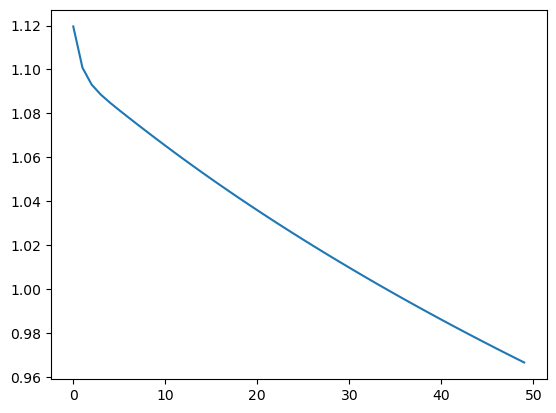

In [115]:
import matplotlib.pyplot as plt
plt.plot(list(range(numberOfEpochs)), losses)
plt.show()